In [1]:
import os
import pandas as pd   # importing and manipulating data
import numpy as np    # for performing linear algebric functions
import matplotlib.pyplot as plt    #visualization of data
plt.style.use('ggplot')
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()


import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from iso3166 import countries

In [2]:
april_df = pd.read_csv('E:/Project 5 credits/Final Project/April 2020/april tweets.csv',lineterminator='\n')
april_df.head()

Unnamed: 0            status_id              user_id            created_at  \
0           0  1255285670781878275  1244488571026690048  2020-04-29T00:00:00Z   
1           1  1255285670182113282   817072420947247104  2020-04-29T00:00:00Z   
2           2  1255285669259292673            184827671  2020-04-29T00:00:00Z   
3           3  1255285669888438272             82608449  2020-04-29T00:00:00Z   
4           4  1255285670903496707  1042498579909107712  2020-04-29T00:00:00Z   

       screen_name                                               text  \
0        NikoledMX  Las solicitudes de hospitales y otras organiza...   
1     Tu_IMSS_Coah  Prepara tu propio gel antibacterial  es fácil ...   
2    AntenaSanLuis  Por más terror que cause, la apocalíptica rela...   
3   DiarioPresente  Panorama en #Tabasco de casos de #COVID19 #Ent...   
4  ContraReplicaMX  #Francia comenzará a levantar las medidas de c...   

      source  reply_to_status_id  reply_to_user_id reply_to_screen_name  ...  \
0  TweetDeck                 NaN               NaN                  NaN  ...   
1  TweetDeck                 NaN               NaN                  NaN  ...   
2  TweetDeck                 NaN               NaN                  NaN  ...   
3  TweetDeck                 NaN               NaN                  NaN  ...   
4  TweetDeck                 NaN               NaN                  NaN  ...   

   retweet_count  country_code  place_full_name  place_type followers_count  \
0              0           NaN              NaN         NaN               3   
1              0           NaN              NaN         NaN            1710   
2              0           NaN              NaN         NaN          122908   
3              3           NaN              NaN         NaN          145940   
4              1           NaN              NaN         NaN           13548   

  friends_count account_lang    account_created_at  verified  lang\r  
0            25          NaN  2020-03-30T04:56:21Z     False    es\r  
1           169          NaN  2017-01-05T18:17:00Z     False    es\r  
2          4370          NaN  2010-08-30T15:47:01Z     False    es\r  
3          3116          NaN  2009-10-15T12:46:02Z     False    es\r  
4          2553          NaN  2018-09-19T19:40:04Z     False    es\r  

[5 rows x 23 columns]

In [3]:
april_df.info(null_counts=True)

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   status_id             100000 non-null  int64  
 2   user_id               100000 non-null  int64  
 3   created_at            100000 non-null  object 
 4   screen_name           100000 non-null  object 
 5   text                  100000 non-null  object 
 6   source                99999 non-null   object 
 7   reply_to_status_id    12030 non-null   float64
 8   reply_to_user_id      14587 non-null   float64
 9   reply_to_screen_name  14587 non-null   object 
 10  is_quote              100000 non-null  bool   
 11  is_retweet            100000 non-null  bool   
 12  favourites_count      100000 non-null  int64  
 13  retweet_count         100000 non-null  int64  
 14  country_code          4409 non-null    object 
 15  p

In [4]:
april_df.describe()

Unnamed: 0     status_id       user_id  reply_to_status_id  \
count  100000.000000  1.000000e+05  1.000000e+05        1.203000e+04   
mean    49999.500000  1.255353e+18  3.744991e+17        1.254875e+18   
std     28867.657797  3.946182e+13  5.144492e+17        7.423146e+15   
min         0.000000  1.255286e+18  1.688000e+03        7.391356e+17   
25%     24999.750000  1.255317e+18  1.864228e+08        1.255220e+18   
50%     49999.500000  1.255356e+18  1.665084e+09        1.255301e+18   
75%     74999.250000  1.255390e+18  9.425984e+17        1.255354e+18   
max     99999.000000  1.255414e+18  1.255412e+18        1.255414e+18   

       reply_to_user_id  favourites_count  retweet_count  followers_count  \
count      1.458700e+04      1.000000e+05  100000.000000     1.000000e+05   
mean       2.517595e+17      1.118189e+04       2.087050     8.078663e+04   
std        4.469438e+17      3.699394e+04      26.081762     6.264088e+05   
min        5.264000e+03      0.000000e+00       0.000000     0.000000e+00   
25%        4.472898e+07      1.510000e+02       0.000000     1.180000e+02   
50%        3.660578e+08      1.276000e+03       0.000000     7.590000e+02   
75%        4.856039e+09      6.890250e+03       1.000000     4.535000e+03   
max        1.255403e+18      1.995152e+06    3845.000000     1.858188e+07   

       friends_count  account_lang  
count   1.000000e+05           0.0  
mean    1.950010e+03           NaN  
std     1.005655e+04           NaN  
min     0.000000e+00           NaN  
25%     1.230000e+02           NaN  
50%     4.420000e+02           NaN  
75%     1.343000e+03           NaN  
max     1.221709e+06           NaN

In [5]:
print('Shape of tweets dataframe : {}'.format(april_df.shape))

Shape of tweets dataframe : (100000, 23)


c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 13 missing from current font.

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 13 missing from current font.



<AxesSubplot:>

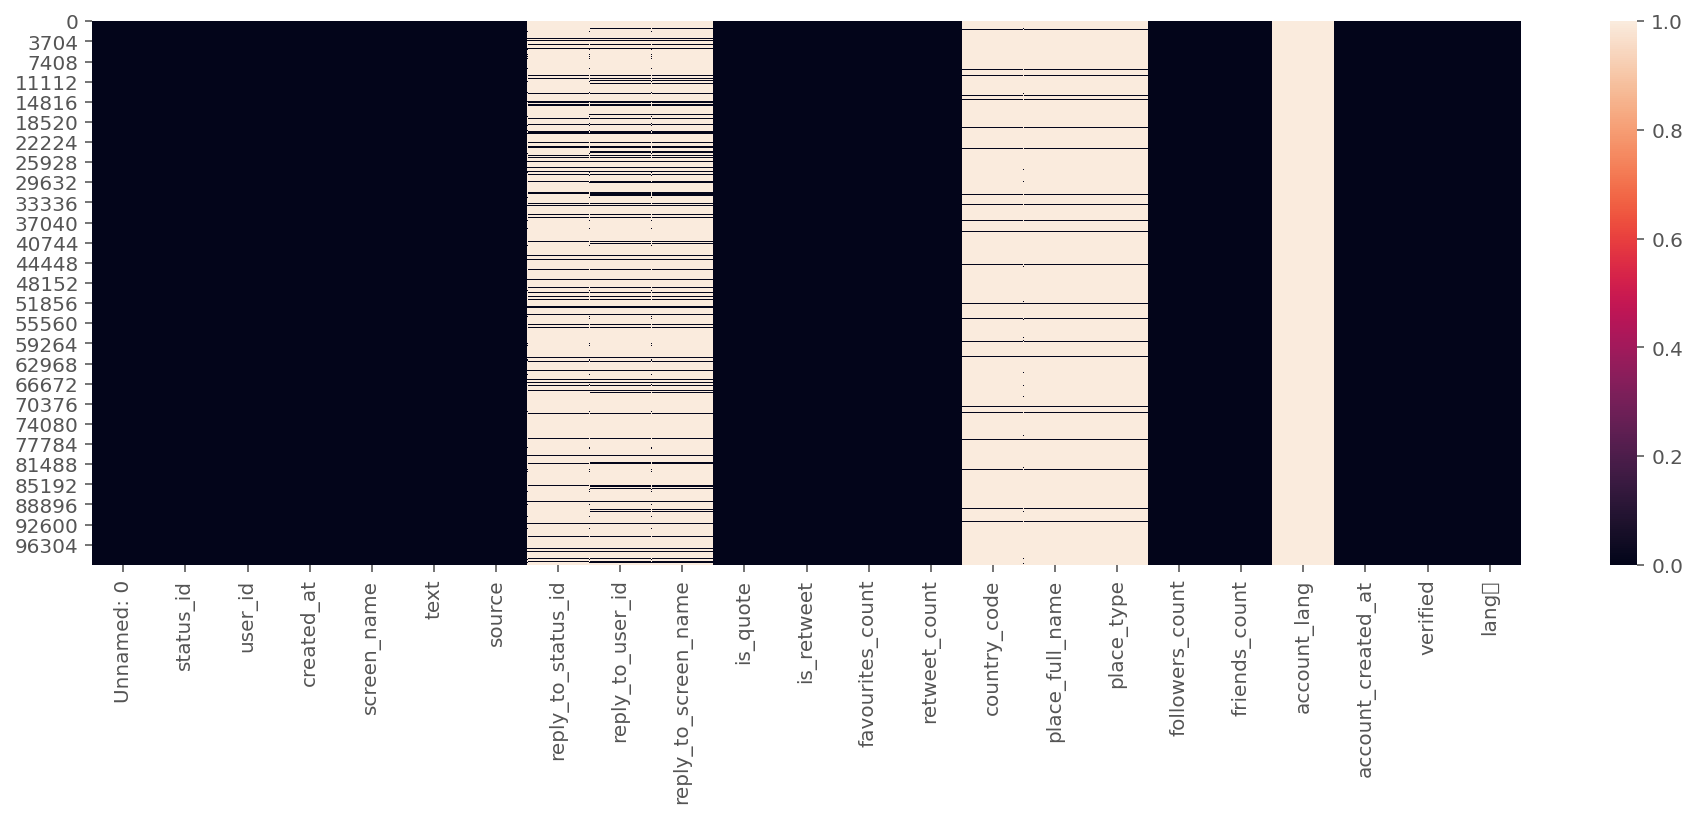

In [6]:
plt.figure(figsize = (16,5))
sns.heatmap(april_df.isnull())

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['Precentage']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='Precentage', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [8]:
return_missing_values(april_df)

source                  0.00001
reply_to_user_id        0.85413
reply_to_screen_name    0.85413
reply_to_status_id      0.87970
place_full_name         0.95580
place_type              0.95580
country_code            0.95591
account_lang            1.00000
dtype: float64

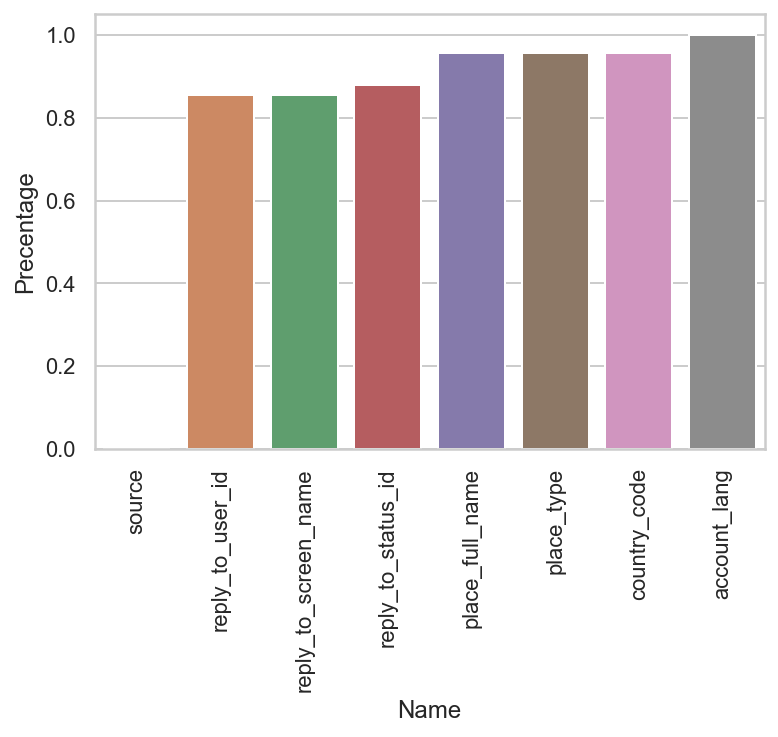

In [9]:
plot_missing_values(april_df)

In [10]:
april_df.corr()

Unnamed: 0  status_id   user_id  reply_to_status_id  \
Unnamed: 0            1.000000   0.997695  0.003004           -0.002697   
status_id             0.997695   1.000000  0.003985           -0.003803   
user_id               0.003004   0.003985  1.000000            0.010891   
reply_to_status_id   -0.002697  -0.003803  0.010891            1.000000   
reply_to_user_id      0.010767   0.010222  0.345398            0.006212   
is_quote             -0.022905  -0.023567 -0.023180           -0.006203   
is_retweet                 NaN        NaN       NaN                 NaN   
favourites_count     -0.044427  -0.045056 -0.106304           -0.001681   
retweet_count        -0.015447  -0.015320 -0.014931            0.003485   
followers_count      -0.002615  -0.001687 -0.090203            0.007508   
friends_count        -0.030600  -0.031139 -0.086783            0.000678   
account_lang               NaN        NaN       NaN                 NaN   
verified              0.023470   0.024129 -0.197060            0.014318   

                    reply_to_user_id  is_quote  is_retweet  favourites_count  \
Unnamed: 0                  0.010767 -0.022905         NaN         -0.044427   
status_id                   0.010222 -0.023567         NaN         -0.045056   
user_id                     0.345398 -0.023180         NaN         -0.106304   
reply_to_status_id          0.006212 -0.006203         NaN         -0.001681   
reply_to_user_id            1.000000 -0.028801         NaN         -0.021493   
is_quote                   -0.028801  1.000000         NaN          0.080885   
is_retweet                       NaN       NaN         NaN               NaN   
favourites_count           -0.021493  0.080885         NaN          1.000000   
retweet_count              -0.003885 -0.008576         NaN          0.011799   
followers_count            -0.058669 -0.038629         NaN         -0.022181   
friends_count              -0.017491  0.000798         NaN          0.177879   
account_lang                     NaN       NaN         NaN               NaN   
verified                   -0.081749 -0.064519         NaN         -0.051785   

                    retweet_count  followers_count  friends_count  \
Unnamed: 0              -0.015447        -0.002615      -0.030600   
status_id               -0.015320        -0.001687      -0.031139   
user_id                 -0.014931        -0.090203      -0.086783   
reply_to_status_id       0.003485         0.007508       0.000678   
reply_to_user_id        -0.003885        -0.058669      -0.017491   
is_quote                -0.008576        -0.038629       0.000798   
is_retweet                    NaN              NaN            NaN   
favourites_count         0.011799        -0.022181       0.177879   
retweet_count            1.000000         0.078674       0.017856   
followers_count          0.078674         1.000000       0.014487   
friends_count            0.017856         0.014487       1.000000   
account_lang                  NaN              NaN            NaN   
verified                 0.097394         0.335198       0.006533   

                    account_lang  verified  
Unnamed: 0                   NaN  0.023470  
status_id                    NaN  0.024129  
user_id                      NaN -0.197060  
reply_to_status_id           NaN  0.014318  
reply_to_user_id             NaN -0.081749  
is_quote                     NaN -0.064519  
is_retweet                   NaN       NaN  
favourites_count             NaN -0.051785  
retweet_count                NaN  0.097394  
followers_count              NaN  0.335198  
friends_count                NaN  0.006533  
account_lang                 NaN       NaN  
verified                     NaN  1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

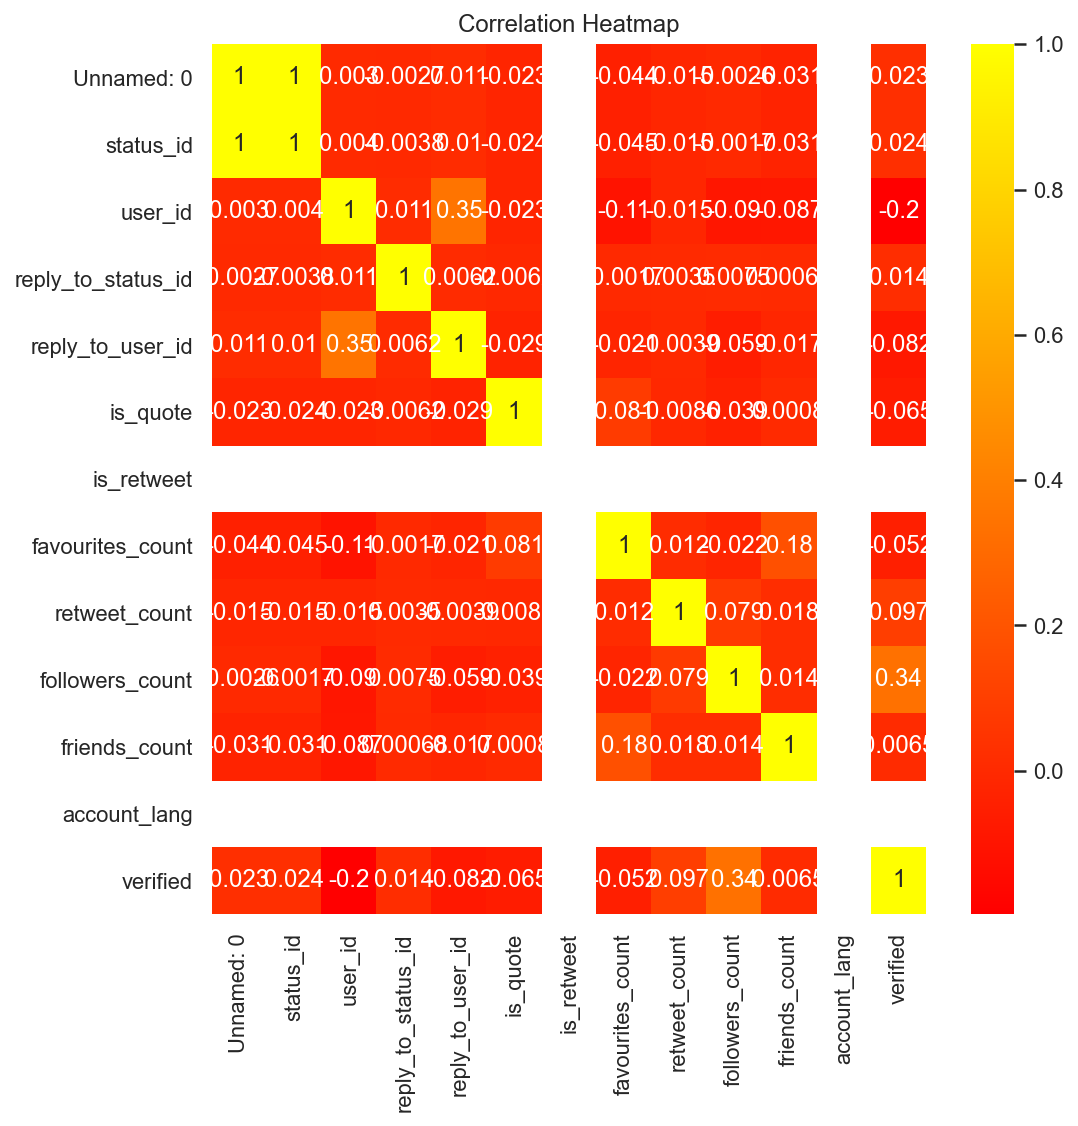

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(april_df.corr(), annot=True, cmap="autumn").set_title('Correlation Heatmap')

In [12]:
april_df = april_df.rename(columns={'screen_name': 'user_name'})

In [13]:
df_new = april_df['user_name'].value_counts().reset_index()
df_new.columns = ['user_name', 'tweets_count']
df_new = df_new.sort_values(['tweets_count'])

fig = px.bar(
    df_new.tail(20), 
    x="tweets_count", 
    y="user_name", 
    orientation='h', 
    title='Top 20 users by number of tweets', 
    width=800, 
    height=800
)

fig.show()

In [14]:
df_new.tail(5)

user_name  tweets_count
4      ThaiPBSNews            62
3        ANCALERTS            72
2  Devendr25548299            80
1  GlobalPandemics           116
0  TomthunkitsMind           153

In [15]:
april_df= pd.merge(april_df, df_new, on='user_name')

In [16]:
april_df.head(5)

Unnamed: 0            status_id              user_id            created_at  \
0           0  1255285670781878275  1244488571026690048  2020-04-29T00:00:00Z   
1           1  1255285670182113282   817072420947247104  2020-04-29T00:00:00Z   
2       12866  1255300894729678849   817072420947247104  2020-04-29T01:00:30Z   
3       23839  1255315868013248512   817072420947247104  2020-04-29T02:00:00Z   
4       34052  1255330969105698817   817072420947247104  2020-04-29T03:00:00Z   

      user_name                                               text     source  \
0     NikoledMX  Las solicitudes de hospitales y otras organiza...  TweetDeck   
1  Tu_IMSS_Coah  Prepara tu propio gel antibacterial  es fácil ...  TweetDeck   
2  Tu_IMSS_Coah  Si empezaste a trabajar, registra ante el #IMS...  TweetDeck   
3  Tu_IMSS_Coah  Conoce los factores que propician el contagio ...  TweetDeck   
4  Tu_IMSS_Coah  Conoce las reglas de etiqueta para prevenir el...  TweetDeck   

   reply_to_status_id  reply_to_user_id reply_to_screen_name  ...  \
0                 NaN               NaN                  NaN  ...   
1                 NaN               NaN                  NaN  ...   
2                 NaN               NaN                  NaN  ...   
3                 NaN               NaN                  NaN  ...   
4                 NaN               NaN                  NaN  ...   

   country_code  place_full_name  place_type  followers_count friends_count  \
0           NaN              NaN         NaN                3            25   
1           NaN              NaN         NaN             1710           169   
2           NaN              NaN         NaN             1710           169   
3           NaN              NaN         NaN             1710           169   
4           NaN              NaN         NaN             1710           169   

  account_lang    account_created_at  verified  lang\r  tweets_count  
0          NaN  2020-03-30T04:56:21Z     False    es\r             1  
1          NaN  2017-01-05T18:17:00Z     False    es\r             4  
2          NaN  2017-01-05T18:17:00Z     False    es\r             4  
3          NaN  2017-01-05T18:17:00Z     False    es\r             4  
4          NaN  2017-01-05T18:17:00Z     False    es\r             4  

[5 rows x 24 columns]

In [17]:
april_df = april_df.rename(columns={'followers_count': 'user_followers'})

In [18]:
data = april_df.sort_values('user_followers', ascending=False)
data = data.drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_followers', 'tweets_count']]
data = data.sort_values('user_followers')

fig = px.bar(
    data.tail(20), 
    x="user_followers", 
    y="user_name", 
    color='tweets_count',
    orientation='h', 
    title='Top 20 users by number of followers', 
    width=800, 
    height=800
)

fig.show()

In [19]:
data.tail(5)

user_name  user_followers  tweets_count
35356  timesofindia        12728697            23
14402          ndtv        12790312            28
10185  CGTNOfficial        14005421            15
43351      detikcom        15939386             7
5812          CNNEE        18581878             1

In [20]:
april_df = april_df.rename(columns={'account_created_at': 'user_created'})

In [21]:
april_df['user_created'] = pd.to_datetime(april_df['user_created'])
april_df['year_created'] = april_df['user_created'].dt.year
data = april_df.drop_duplicates(subset='user_name', keep="first")
data = data[data['year_created']>1970]
data = data['year_created'].value_counts().reset_index()
data.columns = ['year', 'number']

fig = px.bar(
    data, 
    x="year", 
    y="number", 
    orientation='v', 
    title='User created year by year', 
    width=800, 
    height=600
)

fig.show()

In [22]:
data.head()

year  number
0  2009    8942
1  2020    6919
2  2011    6886
3  2019    6625
4  2010    6465

In [23]:
april_df = april_df.rename(columns={'country_code': 'user_location'})

In [24]:
ds = april_df['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'])

fig = px.bar(
    ds.tail(20), 
    x="count", 
    y="user_location", 
    orientation='h', title='Top 20 user locations by number of tweets', 
    width=800, 
    height=800
)

fig.show()

In [25]:
ds.head()

user_location  count
115            BA      1
89             IM      1
90             EG      1
91             LS      1
92             BH      1

In [26]:
def pie_count(data, field, percent_limit, title):
    
    data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(labels=labels,values=datavals)

    layout = go.Layout(
        title = title,
        height=600,
        width=600
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
pie_count(april_df, 'user_location', 0.5, 'Number of tweets per location')

In [27]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [28]:
from wordcloud import WordCloud, STOPWORDS


def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='black',
                    stopwords=set(STOPWORDS),
                    max_words=100,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show() 

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



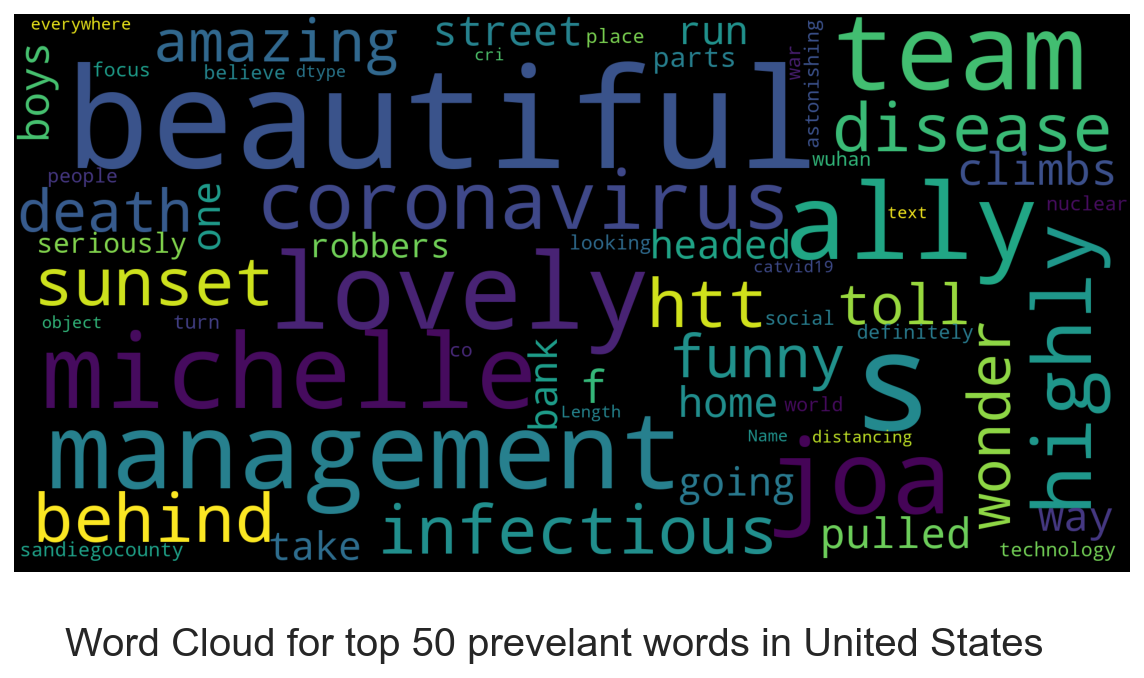

In [29]:
draw_word_cloud(april_df, 'US', 'Word Cloud for top 50 prevelant words in United States')

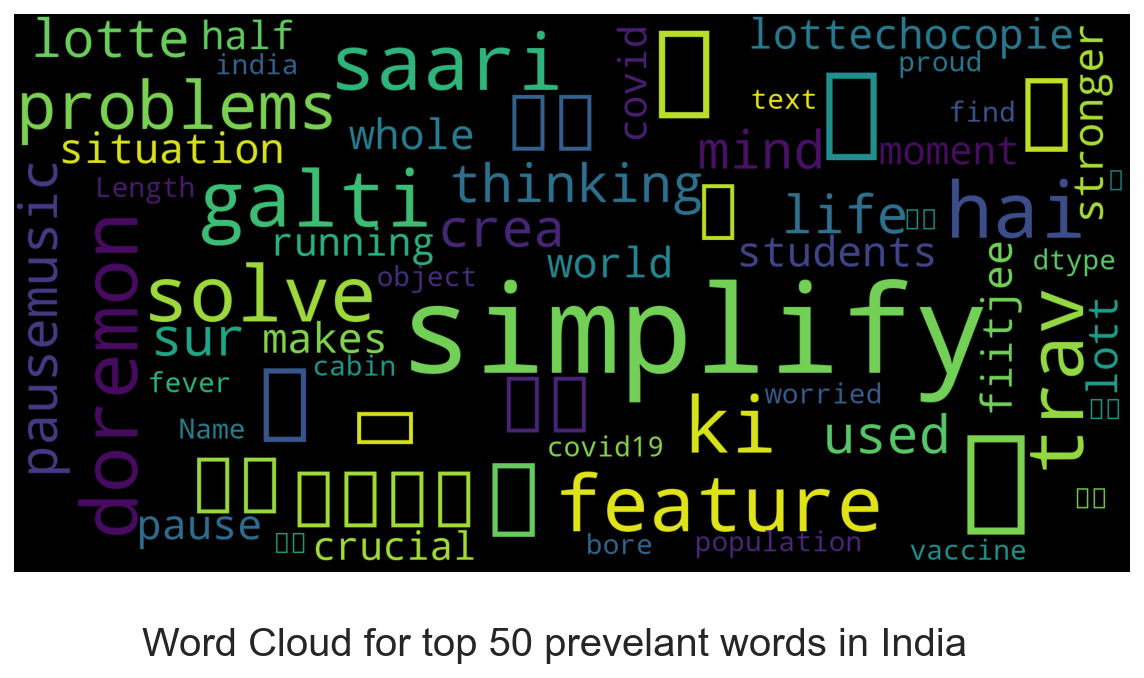

In [30]:
draw_word_cloud(april_df, 'IN', 'Word Cloud for top 50 prevelant words in India')

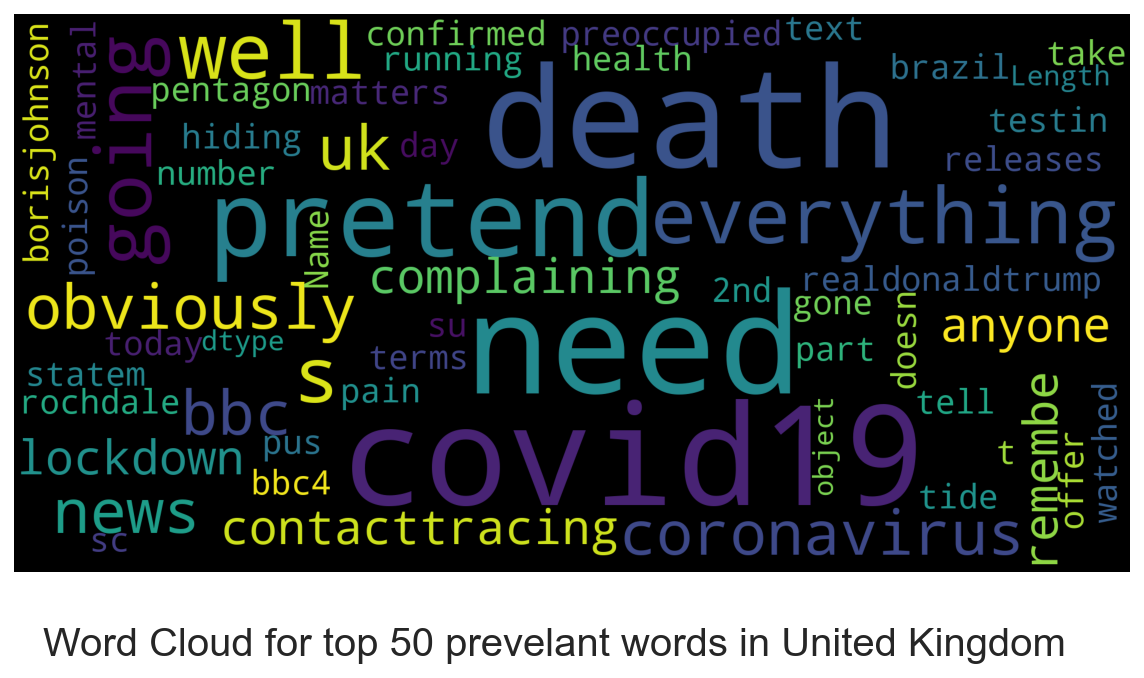

In [31]:
draw_word_cloud(april_df, 'GB', 'Word Cloud for top 50 prevelant words in United Kingdom')

In [32]:
#Just split day and time into separate columns

april_df['date'] = pd.to_datetime(april_df['created_at']) 
april_df = april_df.sort_values(['date'])
april_df['day'] = april_df['date'].astype(str).str.split(' ', expand=True)[0]
april_df['time'] = april_df['date'].astype(str).str.split(' ', expand=True)[1]
april_df.head()

Unnamed: 0            status_id              user_id  \
0             0  1255285670781878275  1244488571026690048   
176          31  1255285671117324291   913732650627665920   
192          32  1255285670786019332  1243253660932386817   
197          33  1255285670765121538           2914458737   
198          34  1255285670672846849             54129406   

               created_at       user_name  \
0    2020-04-29T00:00:00Z       NikoledMX   
176  2020-04-29T00:00:00Z       InfoMdpya   
192  2020-04-29T00:00:00Z       TeziuCast   
197  2020-04-29T00:00:00Z   milexy_garces   
198  2020-04-29T00:00:00Z  donCmontgomery   

                                                  text  \
0    Las solicitudes de hospitales y otras organiza...   
176  General Alvarado autoriza esparcimiento de 13 ...   
192  Tensiones entre pobladores de #Xiutetelco y au...   
197  Yo me imagino que cuando todo esto acabe y abr...   
198  B.C. real estate faces COVID-19 #slump. But ho...   

                      source  reply_to_status_id  reply_to_user_id  \
0                  TweetDeck                 NaN               NaN   
176  Twitter for Advertisers                 NaN               NaN   
192                TweetDeck                 NaN               NaN   
197       Twitter for iPhone                 NaN               NaN   
198                TweetDeck                 NaN               NaN   

    reply_to_screen_name  ...  friends_count  account_lang  \
0                    NaN  ...             25           NaN   
176                  NaN  ...           3666           NaN   
192                  NaN  ...             61           NaN   
197                  NaN  ...             80           NaN   
198                  NaN  ...           2255           NaN   

                 user_created  verified lang\r tweets_count year_created  \
0   2020-03-30 04:56:21+00:00     False   es\r            1         2020   
176 2017-09-29 11:50:15+00:00     False   es\r           16         2017   
192 2020-03-26 19:09:18+00:00     False   es\r            5         2020   
197 2014-12-10 21:30:45+00:00     False   es\r            1         2014   
198 2009-07-06 05:44:27+00:00     False   en\r            1         2009   

                         date         day            time  
0   2020-04-29 00:00:00+00:00  2020-04-29  00:00:00+00:00  
176 2020-04-29 00:00:00+00:00  2020-04-29  00:00:00+00:00  
192 2020-04-29 00:00:00+00:00  2020-04-29  00:00:00+00:00  
197 2020-04-29 00:00:00+00:00  2020-04-29  00:00:00+00:00  
198 2020-04-29 00:00:00+00:00  2020-04-29  00:00:00+00:00  

[5 rows x 28 columns]

In [33]:
april_df['hour'] = april_df['date'].dt.hour
ds = april_df['hour'].value_counts().reset_index()
ds.columns = ['hour', 'count']
ds['hour'] = 'Hour ' + ds['hour'].astype(str)
fig = px.bar(
    ds, 
    x="hour", 
    y="count", 
    orientation='v', 
    title='Tweets distribution over hours', 
    width=800
)
fig.show()

In [34]:
april_df.head(3)

Unnamed: 0            status_id              user_id  \
0             0  1255285670781878275  1244488571026690048   
176          31  1255285671117324291   913732650627665920   
192          32  1255285670786019332  1243253660932386817   

               created_at  user_name  \
0    2020-04-29T00:00:00Z  NikoledMX   
176  2020-04-29T00:00:00Z  InfoMdpya   
192  2020-04-29T00:00:00Z  TeziuCast   

                                                  text  \
0    Las solicitudes de hospitales y otras organiza...   
176  General Alvarado autoriza esparcimiento de 13 ...   
192  Tensiones entre pobladores de #Xiutetelco y au...   

                      source  reply_to_status_id  reply_to_user_id  \
0                  TweetDeck                 NaN               NaN   
176  Twitter for Advertisers                 NaN               NaN   
192                TweetDeck                 NaN               NaN   

    reply_to_screen_name  ...  account_lang              user_created  \
0                    NaN  ...           NaN 2020-03-30 04:56:21+00:00   
176                  NaN  ...           NaN 2017-09-29 11:50:15+00:00   
192                  NaN  ...           NaN 2020-03-26 19:09:18+00:00   

     verified  lang\r tweets_count year_created                      date  \
0       False    es\r            1         2020 2020-04-29 00:00:00+00:00   
176     False    es\r           16         2017 2020-04-29 00:00:00+00:00   
192     False    es\r            5         2020 2020-04-29 00:00:00+00:00   

            day            time  hour  
0    2020-04-29  00:00:00+00:00     0  
176  2020-04-29  00:00:00+00:00     0  
192  2020-04-29  00:00:00+00:00     0  

[3 rows x 29 columns]

In [35]:
april_df.drop(['Unnamed: 0','status_id','user_id','user_location','source','reply_to_status_id','reply_to_user_id','user_created','reply_to_screen_name','account_lang','user_created','verified','user_followers','date','hour','created_at','is_quote','is_retweet','favourites_count','retweet_count','place_type','friends_count','year_created','place_full_name'], axis = 1, inplace = True)
april_df.drop_duplicates()
april_df.head(2)

user_name                                               text lang\r  \
0    NikoledMX  Las solicitudes de hospitales y otras organiza...   es\r   
176  InfoMdpya  General Alvarado autoriza esparcimiento de 13 ...   es\r   

     tweets_count         day            time  
0               1  2020-04-29  00:00:00+00:00  
176            16  2020-04-29  00:00:00+00:00

In [36]:
april_df = april_df.rename(columns={'text': 'tweet', 'day': 'date'})
april_df.head()

user_name                                              tweet lang\r  \
0         NikoledMX  Las solicitudes de hospitales y otras organiza...   es\r   
176       InfoMdpya  General Alvarado autoriza esparcimiento de 13 ...   es\r   
192       TeziuCast  Tensiones entre pobladores de #Xiutetelco y au...   es\r   
197   milexy_garces  Yo me imagino que cuando todo esto acabe y abr...   es\r   
198  donCmontgomery  B.C. real estate faces COVID-19 #slump. But ho...   en\r   

     tweets_count        date            time  
0               1  2020-04-29  00:00:00+00:00  
176            16  2020-04-29  00:00:00+00:00  
192             5  2020-04-29  00:00:00+00:00  
197             1  2020-04-29  00:00:00+00:00  
198             1  2020-04-29  00:00:00+00:00

In [37]:
#As words are in the order of csv files we imported , we have to shuffle the rows & Reindex

april_df = april_df.sample(frac=1).reset_index(drop=True)
april_df.head()

user_name                                              tweet lang\r  \
0   KristinaHafoss  Today, no new #COVID19 case in the Faroe Islan...   en\r   
1        FCosimano  👑 SI EL REY LO DICE 👑\n⠀\nFELIZ DIA 🐾\n⠀\n#dia...   es\r   
2  TomthunkitsMind  OUR GRACIOUS CHILD KING HAS USED HIS “TOTAL AU...   en\r   
3     RavsRavindra  #happiness #happymorning #positivity #loveyour...  und\r   
4      Paquinerazo  Si hablamos de sexo? 😎\n#COVID19 y las medidas...   es\r   

   tweets_count        date            time  
0             1  2020-04-29  07:43:53+00:00  
1             2  2020-04-29  05:03:28+00:00  
2           153  2020-04-29  03:09:16+00:00  
3             1  2020-04-29  03:11:23+00:00  
4             2  2020-04-29  04:37:30+00:00

In [38]:
april_df = april_df[april_df['lang\r'] == 'en\r']
april_df.head()

user_name                                              tweet lang\r  \
0    KristinaHafoss  Today, no new #COVID19 case in the Faroe Islan...   en\r   
2   TomthunkitsMind  OUR GRACIOUS CHILD KING HAS USED HIS “TOTAL AU...   en\r   
9      AirHyderabad  #IndiaFightsCorona: Spitting in public can inc...   en\r   
10     NdnaScotland  See a short video from the @ScotGovEdu on how ...   en\r   
12     RoryBurnside  @COVID_Australia Hey. I think you’ve got the u...   en\r   

    tweets_count        date            time  
0              1  2020-04-29  07:43:53+00:00  
2            153  2020-04-29  03:09:16+00:00  
9              3  2020-04-29  00:16:08+00:00  
10             1  2020-04-29  07:56:00+00:00  
12             6  2020-04-29  03:18:59+00:00

In [39]:
april_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54850 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     54850 non-null  object
 1   tweet         54850 non-null  object
         54850 non-null  object
 3   tweets_count  54850 non-null  int64 
 4   date          54850 non-null  object
 5   time          54850 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.9+ MB


c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [40]:
april_df = pd.concat([april_df], ignore_index=True)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx

import nltk
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
from nltk.util import ngrams
from nltk import bigrams
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nimes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df_new = april_df[april_df['tweet'].notnull()]
df_new['text'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
print(df_new)

             user_name                                              tweet  \
0       KristinaHafoss  Today, no new #COVID19 case in the Faroe Islan...   
1      TomthunkitsMind  OUR GRACIOUS CHILD KING HAS USED HIS “TOTAL AU...   
2         AirHyderabad  #IndiaFightsCorona: Spitting in public can inc...   
3         NdnaScotland  See a short video from the @ScotGovEdu on how ...   
4         RoryBurnside  @COVID_Australia Hey. I think you’ve got the u...   
...                ...                                                ...   
54845           MSKLLP  Here are our latest alerts regarding #COVID19'...   
54846      essaberries  Agreed. Dems aren't concerned about the #Coron...   
54847    CDDWestAfrica  "Earning this trust is not only crucial for th...   
54848    SydneyOfficia  @Cuthbert2411 In NIGERIA, The Most Responsible...   
54849           NTFPD_  ICYMI, today NTF crews practiced #socialdistan...   

      lang\r  tweets_count        date            time  \
0       en\r     

In [43]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df_new['text']=df_new['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df_new['text']=df_new['text'].apply(lambda x:remove_html(x))

# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df_new['text']=df_new['text'].apply(lambda x:lower(x))

# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df_new['text']=df_new['text'].apply(lambda x:remove_num(x))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df_new['text']=df_new['text'].apply(lambda x:punct_remove(x))

def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df_new['text']=df_new['text'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df_new['text']=df_new['text'].apply(lambda x:remove_hash(x))


#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
df_new['text']=df_new['text'].apply(lambda x:remove_space(x))

###########################################################################################################

'''
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'#\w+','',text)
    return text   
df_new['text'] = df_new['text'].apply(lambda x:clean(x))
'''
#All the lexical features were rated for the polarity and intensity on a scale from “-4: Extremely Negative” to “+4 Extremely Positive


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

new_words = {
    'positive covid': -3.0,
    'positive cases': -3.0,
    'tested positive': -3.0,
    'tests positive': -3.0,
}

analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update(new_words)

scores=[]
for i in range(len(df_new['text'])):
    
    score = analyser.polarity_scores(df_new['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_new['sentiment']=pd.Series(np.array(sentiment))

In [44]:
df_new.head()

user_name                                              tweet lang\r  \
0   KristinaHafoss  Today, no new #COVID19 case in the Faroe Islan...   en\r   
1  TomthunkitsMind  OUR GRACIOUS CHILD KING HAS USED HIS “TOTAL AU...   en\r   
2     AirHyderabad  #IndiaFightsCorona: Spitting in public can inc...   en\r   
3     NdnaScotland  See a short video from the @ScotGovEdu on how ...   en\r   
4     RoryBurnside  @COVID_Australia Hey. I think you’ve got the u...   en\r   

   tweets_count        date            time  \
0             1  2020-04-29  07:43:53+00:00   
1           153  2020-04-29  03:09:16+00:00   
2             3  2020-04-29  00:16:08+00:00   
3             1  2020-04-29  07:56:00+00:00   
4             6  2020-04-29  03:18:59+00:00   

                                                text sentiment  
0  today new covid case faroe islands borders alm...  Negative  
1  our gracious child king has used his total aut...  Positive  
2  indiafightscorona spitting public increase ris...  Positive  
3  see short video scotgovedu help prevent spread...  Positive  
4  covid_australia hey i think youve got arrows r...  Positive

(-0.5, 399.5, 199.5, -0.5)

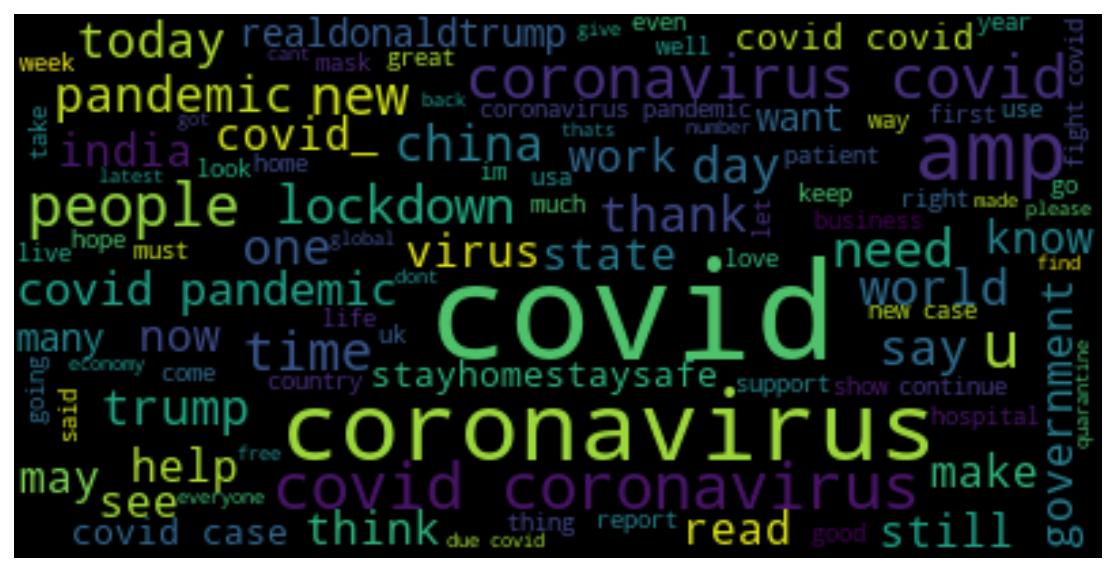

In [45]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

tweet_All = " ".join(review for review in df_new.text)


fig, ax = plt.subplots(1, 1, figsize  = (16,5))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [46]:
df_new['text']

0        today new covid case faroe islands borders alm...
1        our gracious child king has used his total aut...
2        indiafightscorona spitting public increase ris...
3        see short video scotgovedu help prevent spread...
4        covid_australia hey i think youve got arrows r...
                               ...                        
54845    here latest alerts regarding covids effect var...
54846    agreed dems concerned coronaviruspandemic all ...
54847    earning trust crucial struggle covid also nige...
54848    cuthbert in nigeria the most responsible reaso...
54849    icymi today ntf crews practiced socialdistanci...
Name: text, Length: 54850, dtype: object

In [47]:
temp = df_new.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

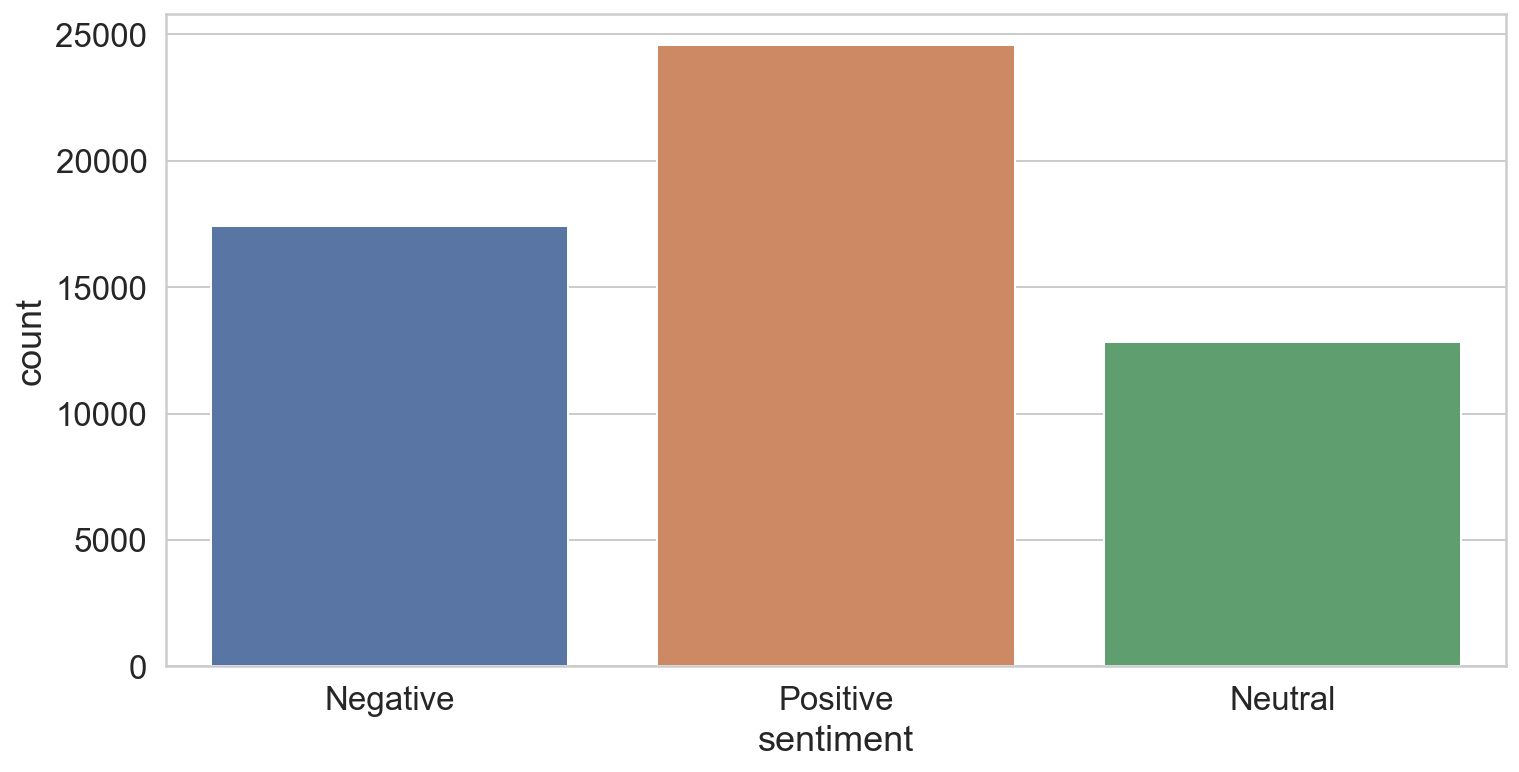

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_new)

In [49]:
import plotly.graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

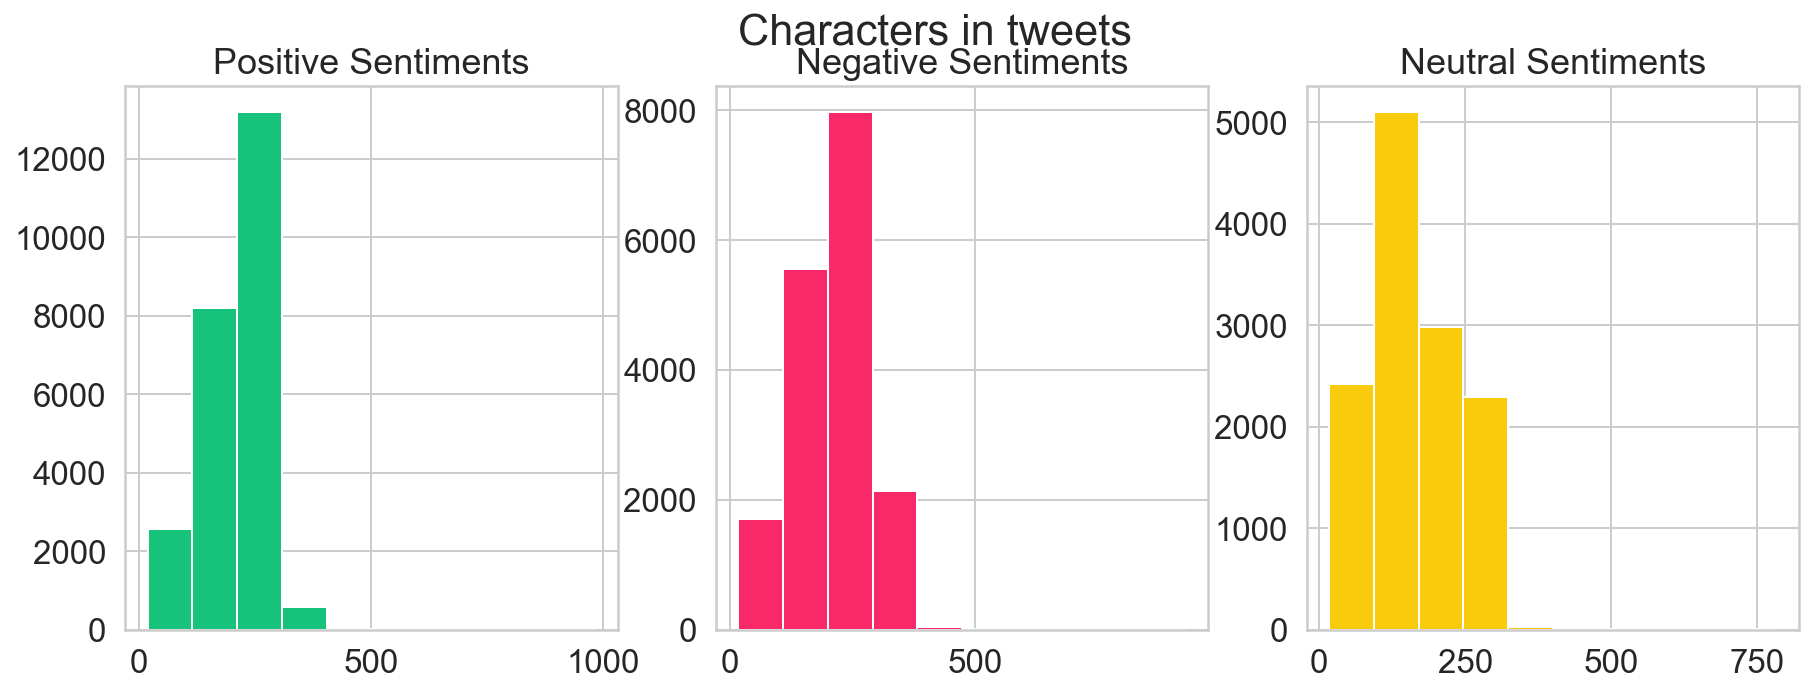

In [50]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=df_new[df_new['sentiment']=="Positive"]['tweet'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=df_new[df_new['sentiment']=="Negative"]['tweet'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=df_new[df_new['sentiment']=="Neutral"]['tweet'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

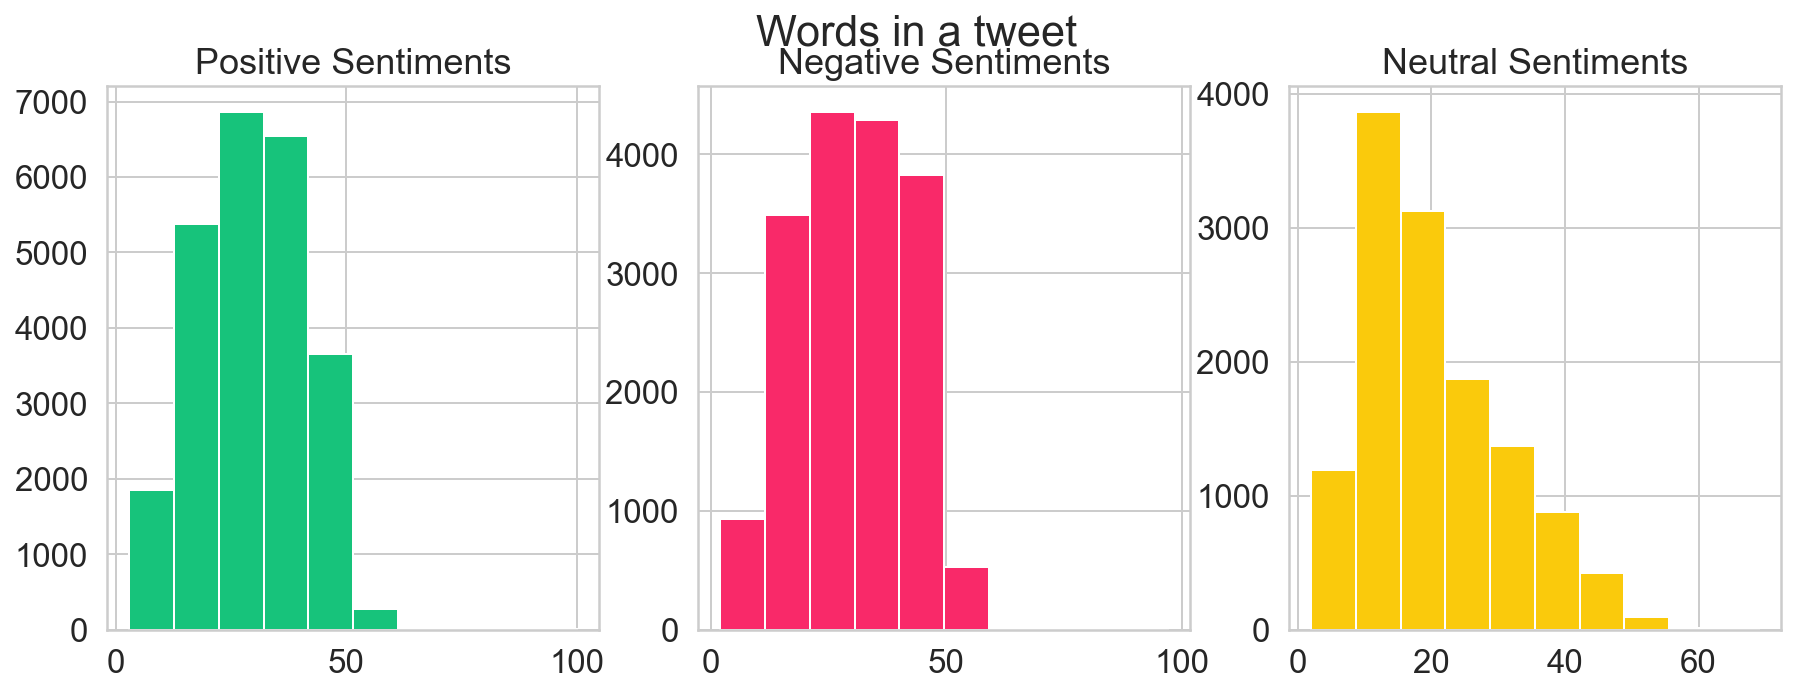

In [51]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len=df_new[df_new['sentiment']=="Positive"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_len=df_new[df_new['sentiment']=="Negative"]['tweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_len=df_new[df_new['sentiment']=="Neutral"]['tweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

In [ ]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(15,5))

word=df_new[df_new['sentiment']=="Positive"]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=df_new[df_new['sentiment']=="Negative"]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')

word=df_new[df_new['sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='#FACA0C')
ax3.set_title('Neutral')


fig.suptitle('Average word length in each tweet')

Text(0.5, 0.98, 'Average word length in each tweet')

In [ ]:
np.array(stopwords)

In [ ]:
comment_words = '' 
stopwords1 = set(STOPWORDS) 
  
for val in stopwords: 
      
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
fig, ax = plt.subplots(1, 1, figsize  = (16,5))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(comment_words)



# plot the WordCloud image                        
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.axis('off')
  
plt.show() 

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = df_new[df_new["sentiment"]=="Positive"]
df_neg = df_new[df_new["sentiment"]=="Negative"]
df_neu = df_new[df_new["sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);

comment_words = ''
for val in df_neu.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);

In [ ]:
from collections import defaultdict

# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30


positive= df_new["sentiment"]== "Positive"
negative= df_new["sentiment"]== "Negative"
neutral= df_new["sentiment"]== "Neutral"

positive_unigrams = defaultdict(int)
neutral_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in df_new[positive]['text']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
        
for tweet in df_new[negative]['text']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
        
for tweet in df_new[neutral]['text']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1        
        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_unigrams = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_unigrams[0].values[:N], x=df_neutral_unigrams[1].values[:N], ax=axes[2], color='#FACA0C')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=30)

axes[0].set_title(f'Top {N} most common unigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common unigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
# Bigrams
positive_bigrams = defaultdict(int)
neutral_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in df_new[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1
        
for tweet in df_new[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1
        
for tweet in df_new[neutral]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        neutral_bigrams[word] += 1        
        
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_bigrams = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_bigrams[0].values[:N], x=df_neutral_bigrams[1].values[:N], ax=axes[2], color='#FACA0C')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=30)

axes[0].set_title(f'Top {N} most common bigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common bigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
# Trigrams
positive_trigrams = defaultdict(int)
neutral_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in df_new[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1
        
for tweet in df_new[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1
        
for tweet in df_new[neutral]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        neutral_trigrams[word] += 1        
        
df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_trigrams = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_trigrams[0].values[:N], x=df_neutral_trigrams[1].values[:N], ax=axes[2], color='#FACA0C')




for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=30)

axes[0].set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common trigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
df_new.head()

In [ ]:
df_new = df_new.drop(df_new[df_new.tweets_count >= 10].index)

In [ ]:
#As words are in the order of csv files we imported , we have to shuffle the rows & Reindex

df_new = df_new.sample(frac=1).reset_index(drop=True)
df_new.head()

In [ ]:
print(df_new)

In [ ]:
df_new_final = pd.concat([df_new.iloc[0:40000]])

In [ ]:
len(df_new_final)

In [ ]:
export_csv = df_new_final.to_csv(r'covid19 april tweets.csv')